In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

In [3]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]

In [4]:
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

In [20]:
X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

In [38]:
def h(w, x):    
    return np.sign(np.dot(w.T, x))

In [39]:
def has_converged(X, y, w):    
    return np.array_equal(h(w, X), y)

In [98]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    count = 0
    while True:
        # mix data
        count += 1
        print(count)
        mix_id = np.random.permutation(N)
        print(mix_id)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi: # misclassified point
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 
                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [99]:
d = X.shape[0]

In [56]:
w_init = np.random.randn(d, 1)

In [104]:
(w, mispoints) = perceptron(X, y, w_init)
w[-1]

1
[18  3 17 10  6 13  4 14  5 19  2 16  8  0 12  1 15 11  9  7]
2
[15 18 19  6  8 17  5  7  0 16  4 11  9 14  3 10 12  1 13  2]
3
[13  8  2  3  9 15  0  6 12  4 16 10  5 19 14  7 18 17  1 11]


array([[ 3.98671288],
       [-6.40177235],
       [ 7.11098116]])

In [113]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = 0, 10
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [0, 10], 'k')

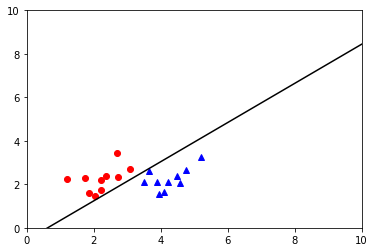

In [114]:
plt.plot(X0.T[:, 0], X0.T[:, 1], 'ro')
plt.plot(X1.T[:, 0], X1.T[:, 1], 'b^')
plt.axis([0, 10, 0, 10])
draw_line(w[-1])